In [2]:
from uavsar_pytools import UavsarScene, UavsarImage
from uavsar_pytools.snow_depth_inversion import depth_from_phase, phase_from_depth
from uavsar_pytools.polsar import H_A_alpha_decomp
import xarray as xa
import rioxarray as rxa
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from os.path import join
from whitebox_tools import WhiteboxTools

In [3]:
data_dir = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/uavsar'

## GRD Interferograms

In [5]:
# url1 = 'https://datapool.asf.alaska.edu/INTERFEROMETRY_GRD/UA/lowman_05208_21015-009_21017-019_0007d_s01_L090_01_int_grd.zip'
# url2 = 'https://datapool.asf.alaska.edu/INTERFEROMETRY_GRD/UA/lowman_23205_21015-008_21017-018_0007d_s01_L090_01_int_grd.zip'
# for url in [url1, url2]:
#     s = UavsarScene(work_dir=data_dir, url = url)
#     s.url_to_tiffs()

## GRD Amplitudes

In [6]:
# data_dir = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/uavsar'
# url1 = 'https://datapool.asf.alaska.edu/AMPLITUDE_GRD/UA/lowman_05208_21015-009_21017-019_0007d_s01_L090_01_amp_grd.zip'
# url2 = 'https://datapool.asf.alaska.edu/AMPLITUDE_GRD/UA/lowman_23205_21015-008_21017-018_0007d_s01_L090_01_amp_grd.zip'
# for url in [url1, url2]:
#     s = UavsarScene(work_dir=data_dir, url = url)
#     s.url_to_tiffs()

## GRD Incidence Angle

In [7]:
# inc_url = 'https://datapool.asf.alaska.edu/INC/UA/lowman_05208_21015_009_210303_L090_CX_01.inc'
# inc_url2 = 'https://datapool.asf.alaska.edu/INC/UA/lowman_23205_21015_008_210303_L090_CX_01.inc'
# for url in [inc_url, inc_url2]:
#     incimg = UavsarImage(url, work_dir= data_dir)
#     incimg.url_to_tiff()

## GRD Polsar

In [8]:
# url1= 'https://uavsar.asf.alaska.edu/UA_lowman_23205_21015_008_210303_L090_CX_01/lowman_23205_21015_008_210303_L090_CX_01_grd.zip'
# url2 = 'https://uavsar.asf.alaska.edu/UA_lowman_23205_21017_018_210310_L090_CX_01/lowman_23205_21017_018_210310_L090_CX_01_grd.zip'
# url3 = 'https://uavsar.asf.alaska.edu/UA_lowman_05208_21017_019_210310_L090_CX_01/lowman_05208_21017_019_210310_L090_CX_01_grd.zip'
# url4 = 'https://uavsar.asf.alaska.edu/UA_lowman_05208_21015_009_210303_L090_CX_01/lowman_05208_21015_009_210303_L090_CX_01_grd.zip'
# for url in [url1, url2,url3, url4]:
#     s = UavsarScene(work_dir=data_dir, url = url)
#     s.url_to_tiffs()

In [9]:
# dir1 = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/uavsar/lowman_05208_21015_009_210303_L090_CX_01_grd'
# dir2 = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/uavsar/lowman_05208_21017_019_210310_L090_CX_01_grd'
# dir3= '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/uavsar/lowman_23205_21015_008_210303_L090_CX_01_grd'
# dir4 = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/uavsar/lowman_23205_21017_018_210310_L090_CX_01_grd'

# for dir in [dir1,dir2,dir3,dir4]:
#     H_A_alpha_decomp(dir, dir)

## GRD LLH LKV

In [10]:
# llh1 = 'https://downloaduav2.jpl.nasa.gov/Release30/lowman_05208_01/lowman_05208_01_BU_s1_2x8.llh'
# lkv1 = 'https://downloaduav2.jpl.nasa.gov/Release30/lowman_05208_01/lowman_05208_01_BU_s1_2x8.lkv'
# llh2 = 'https://downloaduav2.jpl.nasa.gov/Release30/lowman_05208_01/lowman_05208_01_BU_s2_2x8.llh'
# lkv2 = 'https://downloaduav2.jpl.nasa.gov/Release30/lowman_05208_01/lowman_05208_01_BU_s2_2x8.lkv'
# llh3 = 'https://downloaduav2.jpl.nasa.gov/Release30/lowman_05208_01/lowman_05208_01_BU_s3_2x8.llh'
# lkv3 = 'https://downloaduav2.jpl.nasa.gov/Release30/lowman_05208_01/lowman_05208_01_BU_s3_2x8.lkv'

# anc_dir = join(data_dir, 'anc')

# for url in [llh1, lkv1,llh2, lkv2,llh3, lkv3]:
#     ancimag = UavsarImage(url, work_dir= anc_dir, ann_url = 'https://downloaduav2.jpl.nasa.gov/Release30/lowman_05208_01/lowman_05208_20002_006_200131_L090HH_01_BU.ann')
#     ancimag.url_to_tiff()

## Canopies

In [11]:
# import whitebox

# wbt = whitebox.WhiteboxTools()
# wbt.work_dir = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/lidar/'

# wbt.average_overlay(inputs='20210303_DC-canopyheight.tif;20210310_DC-canopyheight.tif', output='canopy_merged.tif')

## reproject match

In [12]:
can = rxa.open_rasterio('/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/lidar/canopy_merged.tif')

s1f = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/lidar/20210303_DC-snowdepth.tif'
s2f = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/lidar/20210310_DC-snowdepth.tif'
s1 = rxa.open_rasterio(s1f, masked= True)
s2 = rxa.open_rasterio(s2f, masked= True)

corf = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/uavsar/lowman_05208_21015-009_21017-019_0007d_s01_L090_01_int_grd/lowman_05208_21015-009_21017-019_0007d_s01_L090HH_01.cor.grd.tiff'
corHH = rxa.open_rasterio(corf, masked = True)
s1_repro = s1.rio.reproject(corHH.rio.crs)
corHH = corHH.rio.clip_box(*s1_repro.rio.bounds())

In [32]:
s1 = rxa.open_rasterio(s1f, masked= True)
s2 = rxa.open_rasterio(s2f, masked= True)

s1_re = s1.rio.reproject_match(corHH)
s1_re = s1_re.assign_coords({
    "x": corHH.x,
    "y": corHH.y,
})
s1_re.values[s1_re.values > 1e20] = np.nan
s2_re = s2.rio.reproject_match(corHH)
s2_re = s2_re.assign_coords({
    "x": corHH.x,
    "y": corHH.y,
})
s2_re.values[s2_re.values > 1e20] = np.nan
can = can.rio.reproject_match(corHH)
can = can.assign_coords({
    "x": corHH.x,
    "y": corHH.y,
})
can.values[can.values > 1e20] = np.nan
can.values[can.values < -1] = np.nan
diff = s2_re - s1_re
diff.rio.to_raster('/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/lidar/snow_diff.tif')

In [37]:
ds = xa.Dataset({
    'sd_diff': diff,
    'canopy': can,
    'sd1': s1_re,
    'sd2':s2_re,
})
ds['canopy'].values[ds['canopy'].values == -32768] = np.nan
ds['sd_diff'].values[ds['sd_diff'].values == 0] = np.nan

In [43]:
# generated with GDAL: https://gdal.org/programs/gdaldem.html

lidar_data_fp = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/lidar'

dem_imports = {'bare_earth':join(lidar_data_fp, 'DC_REFDEM_WGS84.tif'),
'hillshade':join(lidar_data_fp, 'hillshade.tif'),
'slope':join(lidar_data_fp, 'slope.tif'),
'aspect':join(lidar_data_fp, 'aspect.tif'),
'tpi':join(lidar_data_fp, 'tpi.tif'),
'tri':join(lidar_data_fp, 'tri.tif'),
'roughness':join(lidar_data_fp, 'roughness.tif')}
for name, fp in dem_imports.items():
    raster = rxa.open_rasterio(fp, masked = True)
    raster = raster.rio.reproject_match(corHH)
    raster = raster.assign_coords({
        "x": corHH.x,
        "y": corHH.y,
    })
    ds[name] = (raster.dims, raster.values)

In [13]:
# glad_fp = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/etc/Forest_height_2019_NAM.tif'
# raster = rxa.open_rasterio(glad_fp)
# raster.clip
# raster = raster.rio.reproject_match(corHH)
# raster = raster.assign_coords({
#     "x": corHH.x,
#     "y": corHH.y,
# })
# ds['canopy_glad'] = (raster.dims, raster.values)

: 

: 

In [44]:
for dir in ['052', '232']:
    if dir == '052':
        us_fp = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/uavsar/lowman_05208_21015-009_21017-019_0007d_s01_L090_01_int_grd'
    else:
        us_fp = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/uavsar/lowman_23205_21015-008_21017-018_0007d_s01_L090_01_int_grd'
    for type in ['cor','unw']:
        for pol in ['VV','VH','HV','HH']:
            for f in glob(join(us_fp, f'*{pol}*.{type}*.tiff')):
                i = rxa.open_rasterio(f)
                i = i.rio.clip_box(*s1_repro.rio.bounds())
                ds[f'{dir}_{type}_{pol}'] = (i.dims, i.values)
                
for dir in ['052', '232']:
    if dir == '052':
        amp_fp = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/uavsar/lowman_05208_21015-009_21017-019_0007d_s01_L090_01_amp_grd'
    else:
        amp_fp = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/uavsar/lowman_23205_21015-008_21017-018_0007d_s01_L090_01_amp_grd'
    for type in ['amp1','amp2']:
        for pol in ['VV','VH','HV','HH']:
            for f in glob(join(amp_fp, f'*{pol}*.{type}*.tiff')):
                i = rxa.open_rasterio(f)
                i = i.rio.clip_box(*s1_repro.rio.bounds())
                ds[f'{dir}_{type}_{pol}'] = (i.dims, i.values)
for dir in ['052', '232']:
    if dir == '052':
        k = 9
        l = 8
    else:
        k = 8
        l = 5
    inc_fp = f'/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/uavsar/lowman_{dir}0{l}_21015_00{k}_210303_L090_CX_01.inc.tiff'
    i = rxa.open_rasterio(inc_fp)
    i = i.rio.clip_box(*s1_repro.rio.bounds())
    ds[f'{dir}_inc'] = ( i.dims, i.values)

In [45]:
for name in ds.data_vars:
    if 'unw' in name and 'sd' not in name:
        da = ds[name]
        if '052' in name:
            inc = ds[f'052_inc']
        elif '232' in name:
            inc = ds[f'232_inc']
        phase_ideal = phase_from_depth(ds['sd_diff'].mean().values.ravel()[0], inc[0,1000,1000].values, density = 250)
        phase_real = da.mean().values.ravel()[0]
        # i = j = 0
        # while np.isnan(phase_ideal) or np.isnan(phase_real):
        #     if 1000 + i == ds['sd_diff'].shape[1]-1:
        #         j += 1
        #         i = 0
        #     phase_ideal = phase_from_depth(ds['sd_diff'][0,1000+i,1000+j].values, inc[0,1000+i,1000+j].values, density = 250)
        #     phase_real = da[0,0+i,1000+j].values
        #     print(phase_ideal, phase_real)
        #     i += 1
        shift = phase_real - phase_ideal
        da_cor = da - shift
        ds_unw = depth_from_phase(da_cor.values[0], inc.values[0], density = 250)
        ds[f'{name}_sd'] = (da_cor.dims, ds_unw.reshape(1, 1872, 1519))

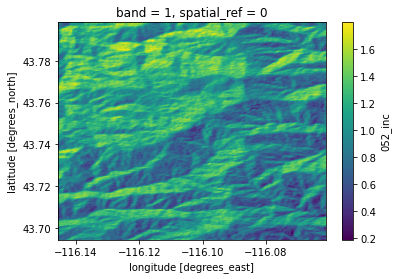

In [46]:
ds['052_inc'].plot()

In [47]:
ds.to_netcdf(join('/Users/zachkeskinen/Documents/uavsar/data/dc_lidar','ds-lidar-us6.nc'))